---
<img src="https://ead.ufes.br/pluginfile.php/188426/course/summary/logo_cluster.png" style="float: right;">


#  Laboratório 01 - Algoritmos de clusterização


Neste Laboratório, vamos avaliar e comparar a qualidade do agrupamento nos algoritmos de clusterização com alguns datasets diferentes.

**Objetivos**

1. Entender o funcionamento dos algoritmos de clusterização: KMeans, DBSCAN, e Hierárquico.
2. Aplicar os algoritmos a diferentes datasets.
3. Comparar o desempenho de cada algoritmo utilizando métricas quantitativas.

**Resultados esperados**

Ao final deste laboratório é esperado que saiba identificar qual algoritmo se adapta melhor a diferentes cenários de dados.

**Valor**: 15 pontos

Para este Laboratório, vamos definir funções que permitam executas os algoritmos abaixo com determinados datasets:

1. **KMeans**
2. **DBSCAN**
3. **Clusterização Hierárquica**


# Parte 1: Datasets sem rótulos sobre os dados

**Valor**: 5 pontos

Inicialmente, iremos carregar os datasets sintéticos. Em seguida, você deverá:

1. Implementar as funções que executam os algoritmos de clusterização da scikitlearn
1. Implementar uma avaliação de medida interna
1. Executar os algortmos.

Importante: Não altere os nomes das funções, pois elas serão utilizadas em outras partes do código.

## 1. Importando as bibliotecas necessárias.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs, make_moons

## 2. Carregando datasets sintéticos

1. `X_blobs, y_blobs`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato globulares.
1. `X_moon, y_moon`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato de meia lua.

In [3]:
# Dataset 1: Blobs (Esférico)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Dataset 2: Moons (Lua Crescente)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# definindo uma função para visualização dos dados.
def plot_scatter(X_axis, y_axis,title):

    if isinstance(X_axis, pd.DataFrame):
        X_axis = X_axis.values  # Convert to NumPy array
    plt.scatter(X_axis[:, 0], X_axis[:, 1], c=y_axis)
    plt.title(title)
    plt.show()

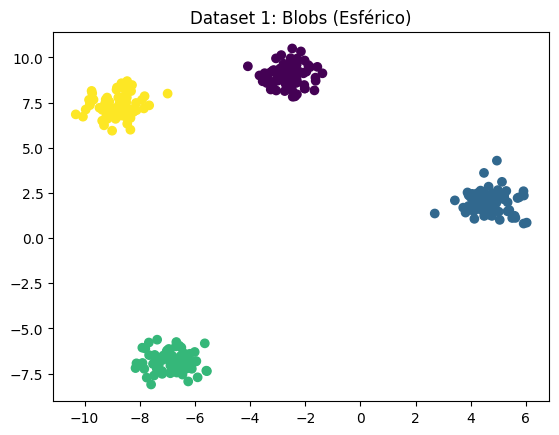

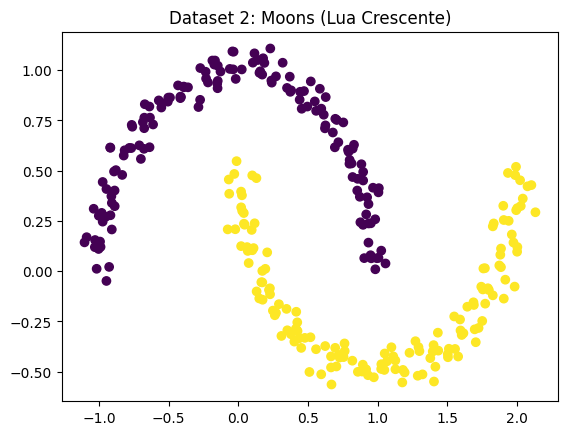

In [4]:
# Visualizando os datasets
plot_scatter(X_blobs, y_blobs, "Dataset 1: Blobs (Esférico)")
plot_scatter(X_moons, y_moons, "Dataset 2: Moons (Lua Crescente)")

## 3. Implemente as funções que para execução dos algoritmos de clusterização abaixo.

**Agora é com você!!!**

Utilizando a biblioteca `scikitlearn` desenvolva uma função que execute os algoritmos abaixo. O objetivo é ter uma função que facilite fazer chamadas de execução dos algoritmos para cada dataset.

> Revisite os Notebooks 01, 02, 03 e 04, se necessário.

### A.  **K-Means**

In [5]:
# Algoritmo KMeans
# X é o dataset que deverá ser agrupado e n_cluster o parâmetro k do K-means
#Retorna os labels dos clusters para cada ponto em X
def cluster_kmeans(X, n_clusters):
     #seu codigo aqui
     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
     kmeans.fit(X)
     labels = kmeans.labels_
     return labels

### B.  **DB-SCAN**

In [6]:
# Algoritmo DBSCAN
# X é o dataset que deverá ser agrupado e eps o raio e min_samples, o mínimo de elementos,
# como especificado pelo DB-SCAN
#Retorna os labels dos clusters para cada ponto em X
def cluster_dbscan(X, eps, min_samples):
    #seu codigo aqui
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    return labels

### C. Hierárquico Aglomerativo

In [7]:
# Algoritmo Hierárquico Aglomerativo
# X é o dataset que deverá ser agrupado e n_cluster é a quantidade de  clusters final desejada
#Retorna os labels dos clusters para cada ponto em X
def cluster_hierarchical(X, n_clusters):
    #seu codigo aqui
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(X)
    labels = hierarchical.labels_
    return labels

## 4. Implemente uma função de avaliação de medidas internas

Neste exercício, vamos utilizar a `silhouete score` como métrica interna de avaliação dos agrupamentos gerados pelos algoritmos.

In [8]:
# Faça uma função que receba como parametros:
# O vetor de pontos original e o vetor de grupos pelo algoritmo
# retorne o silhouete_score da comparação dos vetores.
def avaliar_clustering(X, labels):
    #seu codigo aqui
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.2f}")
    return score

## 5. Execute os algoritmos de clusterização

Este exercício considera que você não alterou os nomes das funções definidas nos exercícios 3 e 4.

Você deve setar os valores dos principais parametros para cada dataset.

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o silhouete score.

KMeans - Dataset 1 (Blobs)
Silhouette Score: 0.88


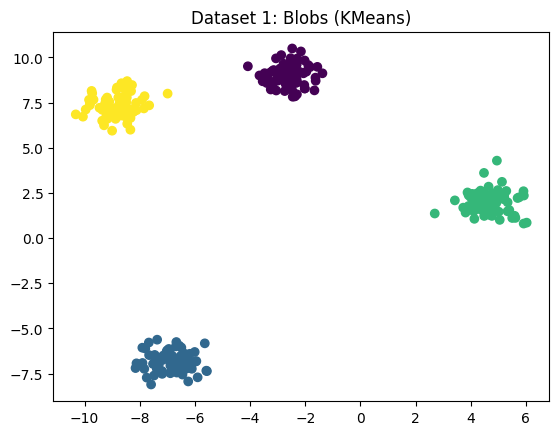

In [9]:
#@title Dataset  Blobs (KMeans)
k = 4 #@param
labels_kmeans_blob = cluster_kmeans(X_blobs, n_clusters=k)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_blobs, labels_kmeans_blob)

plot_scatter(X_blobs, labels_kmeans_blob, "Dataset 1: Blobs (KMeans)")

KMeans - Dataset 1 (Blobs)
Silhouette Score: 0.49


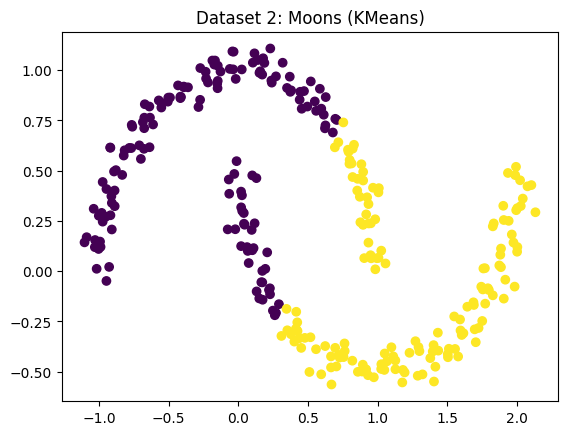

In [23]:
#@title Dataset Moon (KMeans)
k = 2 #@param
labels_kmeans_moons = cluster_kmeans(X_moons, n_clusters=k)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_moons, labels_kmeans_moons)

plot_scatter(X_moons, labels_kmeans_moons, "Dataset 2: Moons (KMeans)")

> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: 4

Moon: 2

### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

Best eps: 1.1
Best minPts: 2
Best silhouette score: 0.8756469540734731
Silhouette Score: 0.88


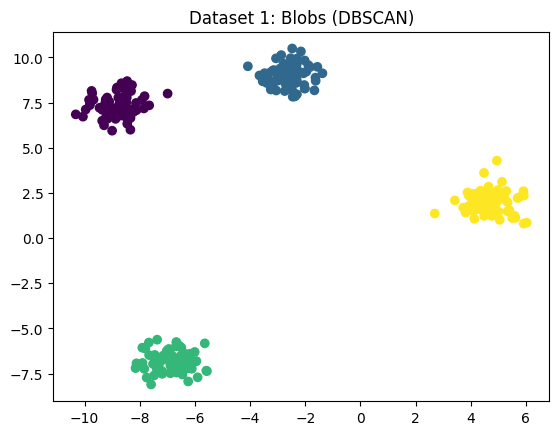

In [10]:
#@title Dataset Blobs (DBSCAN)
eps_values = np.linspace(0.1, 5.0, 50)
minPts_values = range(2, 10)

best_score = -1
best_eps = None
best_minPts = None

for eps in eps_values:
    for minPts in minPts_values:
        labels_dbscan_blob = cluster_dbscan(X_blobs, eps=eps, min_samples=minPts)
        
        if len(np.unique(labels_dbscan_blob)) > 1:
            score = silhouette_score(X_blobs, labels_dbscan_blob)
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minPts = minPts

print(f"Best eps: {best_eps}")
print(f"Best minPts: {best_minPts}")
print(f"Best silhouette score: {best_score}")

labels_dbscan_blob = cluster_dbscan(X_blobs, eps=best_eps, min_samples=best_minPts)
avaliar_clustering(X_blobs, labels_dbscan_blob)
plot_scatter(X_blobs, labels_dbscan_blob, "Dataset 1: Blobs (DBSCAN)")


Best eps: 0.1
Best minPts: 6
Best silhouette score: 0.38290694746130816
Silhouette Score: 0.38


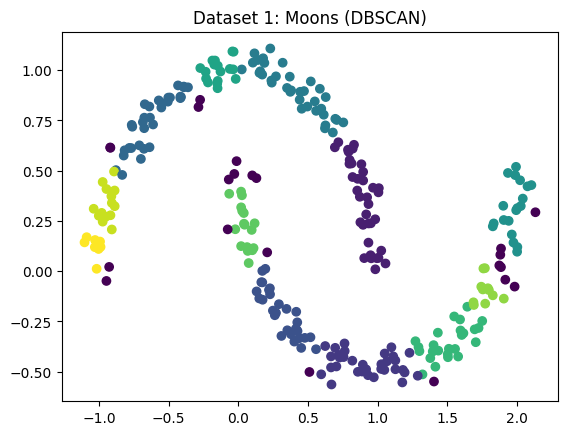

In [ ]:
eps_values = np.linspace(0.1, 2.0, 50)  # Test eps between 0.1 and 2.0
minPts_values = range(2, 10)  # Test minPts from 2 to 10

best_score = -1  # Initialize with the lowest possible silhouette score
best_eps = None
best_minPts = None

# Loop over all combinations of eps and minPts
for eps in eps_values:
    for minPts in minPts_values:
        labels_dbscan_moon = cluster_dbscan(X_moons, eps=eps, min_samples=minPts)
        
        # Check if the number of clusters is greater than 1 to calculate silhouette score
        if len(np.unique(labels_dbscan_moon)) > 1:
            score = silhouette_score(X_moons, labels_dbscan_moon)
            
            # Track the best silhouette score and parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minPts = minPts

print(f"Best eps: {best_eps}")
print(f"Best minPts: {best_minPts}")
print(f"Best silhouette score: {best_score}")

# Use the best parameters to re-run the DBSCAN
labels_dbscan_moon = cluster_dbscan(X_moons, eps=best_eps, min_samples=best_minPts)
avaliar_clustering(X_moons, labels_dbscan_moon)
plot_scatter(X_moons, labels_dbscan_moon, "Dataset 1: Moons (DBSCAN)")


> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: eps: 1.1
       minPts: 2
       Silhouette Score: 0.88

Moon:   eps: 0.1
        minPts: 6
        Silhouette Score: 0.38

### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o silhouete score.

KMeans - Dataset 1 (Blobs)
Silhouette Score: 0.88


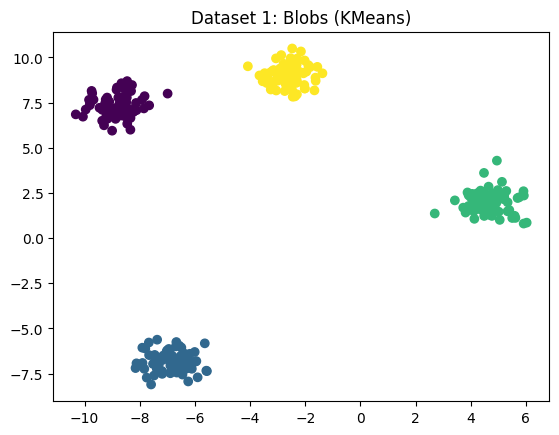

In [16]:
#@title Dataset  Blobs (Hierárquico)
num_cluster = 4 #@param
labels_hier_blob = cluster_hierarchical(X_blobs, n_clusters=num_cluster)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_blobs, labels_hier_blob)

plot_scatter(X_blobs, labels_hier_blob, "Dataset 1: Blobs (KMeans)")

KMeans - Dataset 1 (Blobs)
Silhouette Score: 0.50


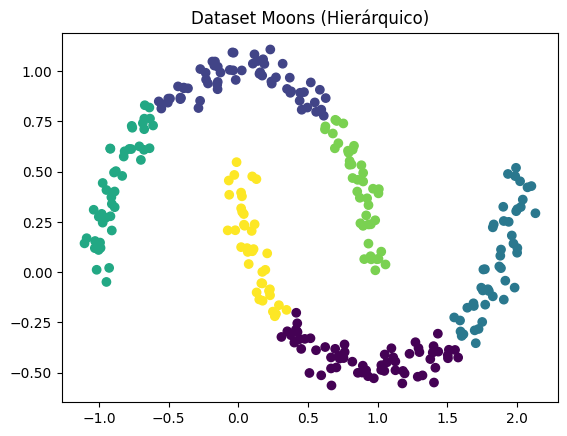

In [38]:
#@title Dataset Moon (Hierárquico)
num_cluster = 6 #@param
labels_hier_moon = cluster_hierarchical(X_moons, n_clusters=num_cluster)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_moons, labels_hier_moon)

plot_scatter(X_moons, labels_hier_moon, "Dataset Moons (Hierárquico)")

# Parte 2. -  Avaliando um dataset com rótulos

**Valor**: 5 pontos

Nesta parte, iremos carregar e avaliar a clusterização do dataset Iris.
O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris.

In [39]:
from sklearn.datasets import load_iris

# Dataset 3: Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

## 6. Avaliação com medida externa

Implemente uma funcção que retorne o rand score de um algortimo de clusterização.

Observe que a assinatura da função será semelhante a implementada no exercício anterior.

In [43]:
from sklearn.metrics import  rand_score
#Implemente uma funcção que retorne o rand score de um algortimo de clusterização.
# Faça uma função que receba como parametros:
# O vetor de pontos original, o vetor de grupos pelo algoritmo e os labels verdadeiros
# retorne o silhouete_score da comparação dos vetores.
def avaliar_clustering_externo(X, labels, true_labels):
    #seu codigo aqui
    ri = rand_score(true_labels, labels)
    print(f"Rand Index: {ri:.2f}")
    return ri

## 7. Compare os KMeans, DBSCAN e Hierárquico

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o rand index.

KMeans - Dataset 1 (Iris)
Rand Index: 0.87


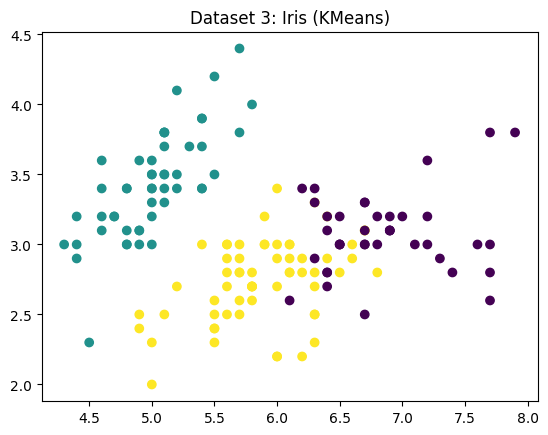

In [53]:
#@title Dataset  Iris (KMeans)
k = 3 #@param
labels_kmeans_iris = cluster_kmeans(X_iris, n_clusters=k)
print("KMeans - Dataset 1 (Iris)")
avaliar_clustering_externo(X_iris, labels_kmeans_iris, y_iris)

plot_scatter(X_iris, labels_kmeans_iris, "Dataset 3: Iris (KMeans)")

> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `rand index`?

**Resposta**: 3


### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

Best DBSCAN Parameters: eps=0.8578947368421053, minPts=2
Best Silhouette Score: 0.6867350732769777
DBSCAN - Dataset 1 (Iris)
Rand Index: 0.78


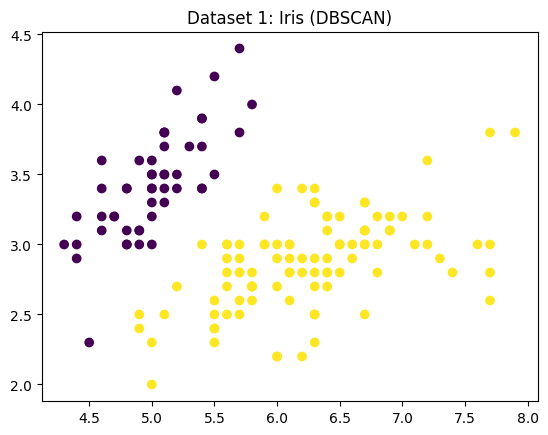

In [55]:
def optimize_dbscan_silhouette(X, eps_range, minPts_range):
    best_score = -1
    best_eps = None
    best_minPts = None
    
    for eps in eps_range:
        for minPts in minPts_range:
            dbscan = DBSCAN(eps=eps, min_samples=minPts)
            labels = dbscan.fit_predict(X)
            
            # Ensure at least 2 clusters exist (silhouette score requires >1 cluster)
            unique_labels = np.unique(labels)
            if len(unique_labels) < 2:
                continue
            
            score = silhouette_score(X, labels)
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minPts = minPts
    
    return {
        "best_eps": best_eps,
        "best_minPts": best_minPts,
        "best_silhouette_score": best_score
    }

# Define search space
eps_values = np.linspace(0.1, 1.0, 20)  # Test eps values from 0.1 to 1.0
minPts_values = range(2, 15)  # Test minPts values from 2 to 15

# Run optimization
best_params = optimize_dbscan_silhouette(X_iris, eps_values, minPts_values)

# Print results
print(f"Best DBSCAN Parameters: eps={best_params['best_eps']}, minPts={best_params['best_minPts']}")
print(f"Best Silhouette Score: {best_params['best_silhouette_score']}")

# Run DBSCAN with best parameters
labels_dbscan_iris = cluster_dbscan(X_iris, eps=best_params["best_eps"], min_samples=best_params["best_minPts"])

# Evaluate and plot
print("DBSCAN - Dataset 1 (Iris)")
avaliar_clustering_externo(X_iris, labels_dbscan_iris, y_iris)

plot_scatter(X_iris, labels_dbscan_iris, "Dataset 1: Iris (DBSCAN)")


> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**: eps=0.8578947368421053, minPts=2


### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o rand index.

KMeans - Dataset 1 (iris)
Rand Index: 0.88


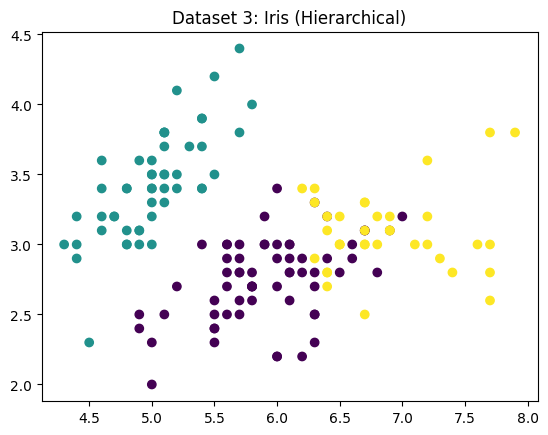

In [60]:
#@title Dataset  Iris (Hierárquico)
num_cluster = 3 #@param
labels_hier_iris = cluster_hierarchical(X_iris, n_clusters=num_cluster)
print("KMeans - Dataset 1 (iris)")
avaliar_clustering_externo(X_iris, labels_hier_iris, y_iris)

plot_scatter(X_iris, labels_hier_iris, "Dataset 3: Iris (Hierarchical)")

### Visualizando hierárquia entre os pontos com um dendograma.

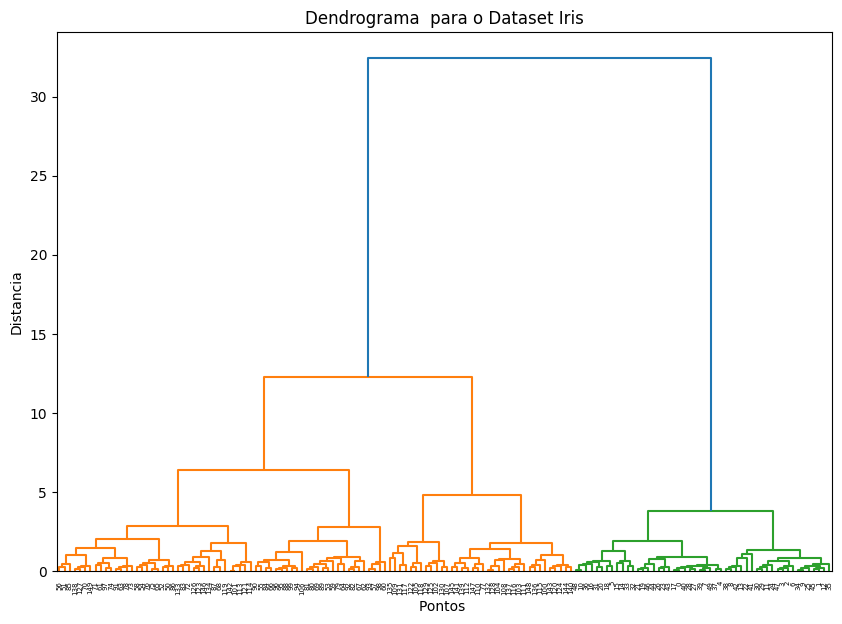

In [61]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_iris, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma  para o Dataset Iris")
plt.xlabel("Pontos ")
plt.ylabel("Distancia")
plt.show()

#  Parte 3: Discussão sobre os resultados

**Valor**: 5 pontos


Discuta sobre os resultados obtidos até aqui no campo abaixo. A discussão deve conter para qual tipo de dado cada algoritmos funcionou melhor e qual(is) parâmetros influenciaram na qualidade dos clusters.


> Escreva sua resposta aqui.

K-Means teve um bom resultado com RI = 0.87 e se a prioridade for rapida execução e eficiencia este seria o ideal.

Hierarquico teve um resultado bom com RI = 0.87, mas o tempo de execução foi maior que o K-Means.

DBScan teve resultado razoável com RI = 0.78 e o tempo de execução foi maior que os outros dois algoritmos. O DBScan é mais indicado para dados com ruido e com clusters de tamanhos diferentes, mas neste caso não se mostrou tão eficiente.
